#                       Titanic: Machine Learning from Disaster

In [81]:
pwd

'E:\\datasets\\titanic'

In [83]:
cd E:\datasets\titanic

E:\datasets\titanic


# Importing all required libraries

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder 
from sklearn.metrics import confusion_matrix, jaccard_similarity_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Data importing ,cleaning and Analysis

In [87]:
df1=pd.read_csv("train.csv")
df2=pd.read_csv("test.csv")
df3=pd.read_csv("gender_submission.csv")

In [88]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [89]:
df1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

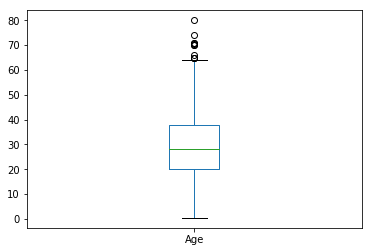

In [90]:
df1['Age'].plot.box()

In [91]:
df1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [92]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [93]:
df2.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [94]:
df1['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [95]:
s = df1['Name'].str.split(",")
df1['Name'] = s.str.get(1)
s= df1['Name'].str.split(".")
df1['Name'] = s.str.get(0)

In [96]:
df1['Name'].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Major             2
 Col               2
 Lady              1
 the Countess      1
 Don               1
 Capt              1
 Ms                1
 Mme               1
 Jonkheer          1
 Sir               1
Name: Name, dtype: int64

In [97]:
c = df2['Name'].str.split(",")
df2['Name'] = c.str.get(1)
c = df2['Name'].str.split(".")
df2['Name'] = c.str.get(0)

In [98]:
df2['Name'].value_counts()

 Mr        240
 Miss       78
 Mrs        72
 Master     21
 Col         2
 Rev         2
 Ms          1
 Dr          1
 Dona        1
Name: Name, dtype: int64

In [99]:
def level(d):
    if d['Name'] == ' Mr':
        return "Mr"
    if d['Name'] == ' Mrs':
        return "Mrs"
    if d['Name'] == ' Miss':
        return "Miss"
    if d['Name'] == ' Master':
        return "Master"
    elif d["Name"] == " Mlle":
        return "Miss"
    else:
        return "Special"

In [100]:
df1['level']= df1.apply(level,axis=1)
df2['level']= df2.apply(level,axis=1)

In [101]:
df1['level'].value_counts()

Mr         517
Miss       184
Mrs        125
Master      40
Special     25
Name: level, dtype: int64

In [102]:
df2['level'].value_counts()

Mr         240
Miss        78
Mrs         72
Master      21
Special      7
Name: level, dtype: int64

In [103]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
dtypes: int64(2)
memory usage: 6.6 KB


In [104]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,level
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,Mr


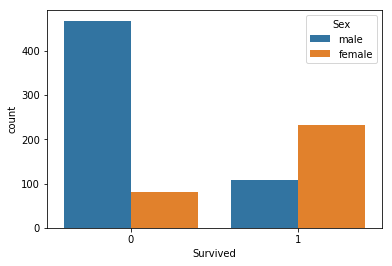

In [105]:
sns.countplot(x='Survived',data=df1,hue='Sex')

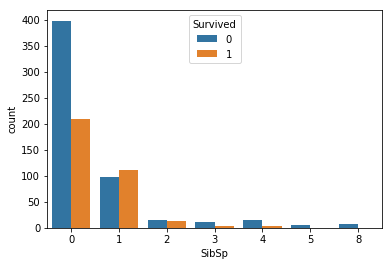

In [106]:
sns.countplot(x='SibSp',hue='Survived',data=df1)

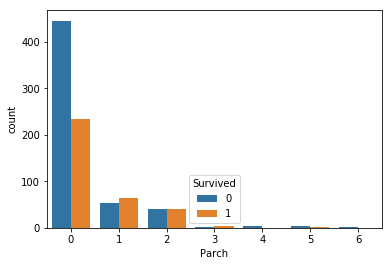

In [107]:
sns.countplot(x='Parch',hue='Survived',data=df1)

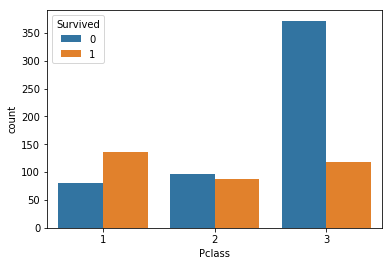

In [108]:
sns.countplot(x='Pclass',hue='Survived',data=df1)

In [109]:
age_train=df1.groupby("level")["Age"].mean()
age_test=df2.groupby("level")["Age"].mean()

In [110]:
df1['Age'].loc[df1["Age"].isnull() & (df1['level'] == "Mr")] = int(age_train["Mr"])
df1['Age'].loc[df1["Age"].isnull() & (df1['level'] == "Mrs")] = int(age_train["Mrs"])
df1['Age'].loc[df1["Age"].isnull() & (df1['level'] == "Master")] = int(age_train["Master"])
df1['Age'].loc[df1["Age"].isnull() & (df1['level'] == "Miss")] = int(age_train["Miss"])
df1['Age'].loc[df1["Age"].isnull() & (df1['level'] == "Special")] = int(age_train["Special"])

df2['Age'].loc[df2["Age"].isnull() & (df2['level'] == "Mr")] = int(age_test["Mr"])
df2['Age'].loc[df2["Age"].isnull() & (df2['level'] == "Mrs")] = int(age_test["Mrs"])
df2['Age'].loc[df2["Age"].isnull() & (df2['level'] == "Master")] = int(age_test["Master"])
df2['Age'].loc[df2["Age"].isnull() & (df2['level'] == "Miss")] = int(age_test["Miss"])
df2['Age'].loc[df2["Age"].isnull() & (df2['level'] == "Special")] = int(age_test["Special"])

C:\Users\admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [111]:
df1['Cabin']=df1['Cabin'].fillna(
    df1['Cabin'].mode()[0])
df1.Embarked= df1.Embarked.fillna(df1.Embarked.mode().iloc[0])



In [112]:
df2['Cabin']=df2['Cabin'].fillna(
    df2['Cabin'].mode()[0])
df2.Embarked = df2.Embarked.fillna(df2.Embarked.mode().iloc[0])

In [113]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
level          0
dtype: int64

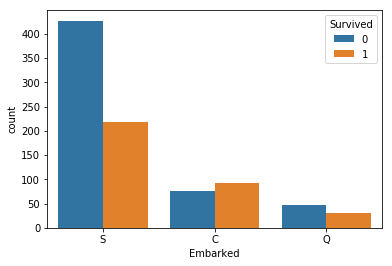

In [114]:
sns.countplot(x='Embarked',hue='Survived',data=df1)

In [115]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,level
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,Mr
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,Miss
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,B96 B98,S,Mr


In [116]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,level
0,892,3,Mr,male,34.5,0,0,330911,7.8292,B57 B59 B63 B66,Q,Mr
1,893,3,Mrs,female,47.0,1,0,363272,7.0000,B57 B59 B63 B66,S,Mrs
2,894,2,Mr,male,62.0,0,0,240276,9.6875,B57 B59 B63 B66,Q,Mr
3,895,3,Mr,male,27.0,0,0,315154,8.6625,B57 B59 B63 B66,S,Mr
4,896,3,Mrs,female,22.0,1,1,3101298,12.2875,B57 B59 B63 B66,S,Mrs


In [117]:
df_dummies1=pd.get_dummies(df1['Sex'])
df_dummies1.drop(df_dummies1.columns[-1],axis=1)
df_dummies4=pd.get_dummies(df1['Embarked'])
df_dummies4.drop(df_dummies4.columns[-1],axis=1)
df_dummies5=pd.get_dummies(df1['level'])
df_dummies5.drop(df_dummies5.columns[-1],axis=1)
df1=pd.concat([df1,df_dummies1],axis=1)
df1=pd.concat([df1,df_dummies4],axis=1)
df1=pd.concat([df1,df_dummies5],axis=1)

In [118]:
df_dummies1=pd.get_dummies(df2['Sex'])
df_dummies1.drop(df_dummies1.columns[-1],axis=1)
df_dummies4=pd.get_dummies(df2['Embarked'])
df_dummies4.drop(df_dummies4.columns[-1],axis=1)
df_dummies5=pd.get_dummies(df2['level'])
df_dummies5.drop(df_dummies5.columns[-1],axis=1)
df2=pd.concat([df2,df_dummies1],axis=1)
df2=pd.concat([df2,df_dummies4],axis=1)
df2=pd.concat([df2,df_dummies5],axis=1)

In [119]:
df1=df1.drop(['Sex'], axis=1)
df1=df1.drop(['Embarked'], axis=1)
df1=df1.drop(['level'], axis=1)
df2=df2.drop(['Sex'], axis=1)
df2=df2.drop(['level'], axis=1)

In [120]:
df2=df2.drop(['Embarked'], axis=1)

In [121]:
df1.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
female         0
male           0
C              0
Q              0
S              0
Master         0
Miss           0
Mr             0
Mrs            0
Special        0
dtype: int64

In [122]:
x=df1.loc[:, ~df1.columns.isin(['PassengerId', 'Survived','Name','Ticket','Fare','Cabin'])].values
y=df1.iloc[:,1].values
x_1=df2.loc[:, ~df2.columns.isin(['PassengerId', 'Survived','Name','Ticket','Fare','Cabin'])].values

In [124]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25)
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Building Model for the dataset

# Logistic Regression

In [125]:
class1=LogisticRegression(random_state = 0)

In [126]:
class1.fit(x_train, y_train)
pred_y=class1.predict(x_test)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [127]:
confusion_matrix(y_test,pred_y)

array([[111,  24],
       [ 20,  68]], dtype=int64)

In [128]:
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       135
           1       0.74      0.77      0.76        88

   micro avg       0.80      0.80      0.80       223
   macro avg       0.79      0.80      0.80       223
weighted avg       0.80      0.80      0.80       223



# Decision Tree

In [129]:
class2 = DecisionTreeClassifier(criterion='entropy', random_state=45)

In [130]:
class2.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=45,
            splitter='best')

In [131]:
pred2_y = class2.predict(x_test)

In [132]:
confusion_matrix(y_test,pred2_y)

array([[118,  17],
       [ 23,  65]], dtype=int64)

In [133]:
print(classification_report(y_test, pred2_y))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       135
           1       0.79      0.74      0.76        88

   micro avg       0.82      0.82      0.82       223
   macro avg       0.81      0.81      0.81       223
weighted avg       0.82      0.82      0.82       223



# Random Forest

In [134]:
class3 = RandomForestClassifier(n_estimators=500, criterion='entropy', random_state=0)

In [135]:
class3.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [136]:
pred3_y = class3.predict(x_test)

In [137]:
confusion_matrix(y_test,pred3_y)

array([[113,  22],
       [ 22,  66]], dtype=int64)

In [138]:
print(classification_report(y_test, pred3_y))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       135
           1       0.75      0.75      0.75        88

   micro avg       0.80      0.80      0.80       223
   macro avg       0.79      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223



# SVM

In [139]:
class4 = SVC(kernel='rbf', random_state=0)

In [140]:
class4.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [141]:
pred4_y= class4.predict(x_test)

In [142]:
confusion_matrix(y_test,pred4_y)

array([[124,  11],
       [ 26,  62]], dtype=int64)

In [143]:
print(classification_report(y_test, pred4_y))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       135
           1       0.85      0.70      0.77        88

   micro avg       0.83      0.83      0.83       223
   macro avg       0.84      0.81      0.82       223
weighted avg       0.84      0.83      0.83       223



# KNN

In [144]:
class5= KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)

In [145]:
class5.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [146]:
pred5_y = class5.predict(x_test)


In [147]:
confusion_matrix(y_test,pred5_y)

array([[116,  19],
       [ 24,  64]], dtype=int64)

In [148]:
print(classification_report(y_test, pred5_y))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       135
           1       0.77      0.73      0.75        88

   micro avg       0.81      0.81      0.81       223
   macro avg       0.80      0.79      0.80       223
weighted avg       0.81      0.81      0.81       223



# Naive Bias

In [149]:
class6 = GaussianNB()

In [150]:
class6.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [151]:
pred6_y = class6.predict(x_test)

In [152]:
confusion_matrix(y_test,pred6_y)

array([[114,  21],
       [ 19,  69]], dtype=int64)

In [153]:
print(classification_report(y_test, pred6_y))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       135
           1       0.77      0.78      0.78        88

   micro avg       0.82      0.82      0.82       223
   macro avg       0.81      0.81      0.81       223
weighted avg       0.82      0.82      0.82       223



# ACCURACY:------

# Logistic Regression=80%

# Decision Tree=82%

# Random Forest=80%

# SVM=83%

# KNN=81%

# Naive Bias=82%